In [1]:
import torch
import torchvision
from torchsummary import summary

import numpy as np
import json

import matplotlib.pyplot as plt

In [46]:
import matplotlib.ticker as mtick

In [8]:
# pruning threshold
threshold_values = np.linspace(0.05, 0.95, 19)

In [3]:
stats_1per_ep01 = json.load(open('experiment_stats_data-1percent_ep-0.1.json', 'r'))
stats_1per_ep04 = json.load(open('experiment_stats_data-1percent_ep-0.4.json', 'r'))

In [25]:
stats_10per_ep01 = json.load(open('experiment_stats_data-10percent_ep-0.1.json', 'r'))
stats_10per_ep04 = json.load(open('experiment_stats_data-10percent_ep-0.4.json', 'r'))

In [22]:
'''
get the time taken to run
lowest ASR, and corresponding ACC

format it as latex table
'''
def extract_stats_table_content(stats_dict):
    for k, v in (stats_dict).items():
        time_taken_list = []
        ASR_at_02_list = []
        ACC_at_02_list = []
        ASR_optimal_list = []
        ACC_optimal_list = []
        for trial in v:
            time_taken_list.append(trial['training_time'])
            ASR_at_02_list.append(trial['ASR'][3])
            ACC_at_02_list.append(trial['ACC'][3])
            op = np.argmin(trial['ASR'])
            ASR_optimal_list.append(trial['ASR'][op])
            ACC_optimal_list.append(trial['ACC'][op])
        time_taken = np.mean(time_taken_list)
        ASR_at_02 = np.mean(ASR_at_02_list)
        ACC_at_02 = np.mean(ACC_at_02_list)
        ASR_optimal = np.mean(ASR_optimal_list)
        ACC_optimal = np.mean(ACC_optimal_list)
        print(f'{k} & {time_taken:.1f} & {ASR_at_02*100:.2f} & {ACC_at_02*100:.2f} & {ASR_optimal*100:.2f} & {ACC_optimal*100:.2f} \\\\')

In [23]:
extract_stats_table_content(stats_1per_ep01)

1 & 98.8 & 16.30 & 64.02 & 0.03 & 23.48 \\
2 & 135.2 & 10.79 & 68.31 & 0.00 & 43.17 \\
5 & 245.5 & 7.69 & 71.41 & 0.01 & 61.00 \\
10 & 429.8 & 5.84 & 69.93 & 0.01 & 60.21 \\


In [24]:
extract_stats_table_content(stats_1per_ep04)

1 & 99.4 & 37.57 & 73.64 & 1.52 & 65.58 \\
2 & 135.8 & 38.76 & 72.21 & 0.52 & 64.18 \\
5 & 246.6 & 68.51 & 53.92 & 3.04 & 53.38 \\
10 & 430.8 & 51.14 & 44.50 & 3.43 & 44.17 \\


In [74]:
'''
plot the threshold to ASR graph
as a mean and std graph
of each trials
'''
def generate_plot_threshold_asr_graph(stats_dict):
    res = {}
    for k, v in stats_dict.items():
        asr = []
        for trial in v:
            asr.append(trial['ASR'])
        asr = np.array(asr)

        asr_mean = np.mean(asr, axis=0)
        asr_std = np.std(asr, axis=0)
        res[k] = (asr_mean, asr_std)
    return res

def generate_plot_threshold_acc_graph(stats_dict):
    res = {}
    for k, v in stats_dict.items():
        acc = []
        for trial in v:
            acc.append(trial['ACC'])
        acc = np.array(acc)

        acc_mean = np.mean(acc, axis=0)
        acc_std = np.std(acc, axis=0)
        res[k] = (acc_mean, acc_std)
    return res

In [72]:
ps = generate_plot_threshold_asr_graph(stats_1per_ep01)

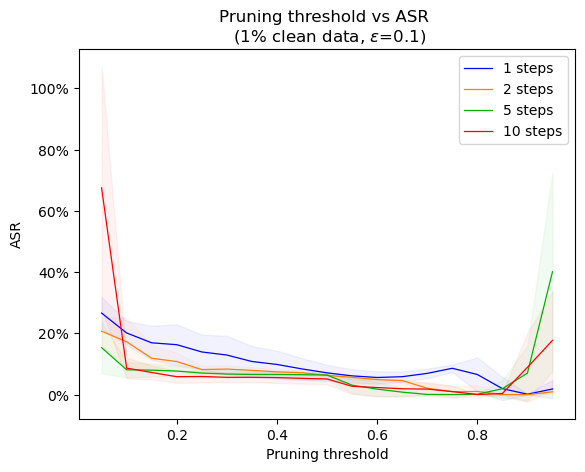

In [73]:
ks = ['1', '2', '5', '10']
colors = [[0, 0, 1], [1, 0.5, 0], [0, 0.7, 0], [1, 0, 0]]

for i in range(4):
    plt.plot(threshold_values, ps[ks[i]][0]*100, color=colors[i], linewidth=0.9, label=f'{ks[i]} steps')
    plt.fill_between(threshold_values, (ps[ks[i]][0]-ps[ks[i]][1])*100, (ps[ks[i]][0]+ps[ks[i]][1])*100, color=colors[i] + [0.05])

plt.title('Pruning threshold vs ASR \n (1% clean data, $\\epsilon$=0.1)')
plt.xlabel('Pruning threshold')
plt.ylabel('ASR')
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [67]:
ps = generate_plot_threshold_asr_graph(stats_1per_ep04)

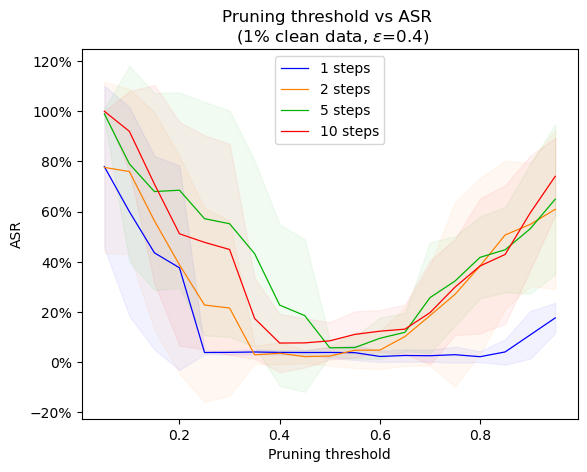

In [71]:
ks = ['1', '2', '5', '10']
colors = [[0, 0, 1], [1, 0.5, 0], [0, 0.7, 0], [1, 0, 0]]

for i in range(4):
    plt.plot(threshold_values, ps[ks[i]][0]*100, color=colors[i], linewidth=0.9, label=f'{ks[i]} steps')
    plt.fill_between(threshold_values, (ps[ks[i]][0]-ps[ks[i]][1])*100, (ps[ks[i]][0]+ps[ks[i]][1])*100, color=colors[i] + [0.05])

plt.title('Pruning threshold vs ASR \n (1% clean data, $\\epsilon$=0.4)')
plt.xlabel('Pruning threshold')
plt.ylabel('ASR')
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [77]:
acc_data = generate_plot_threshold_acc_graph(stats_1per_ep01)

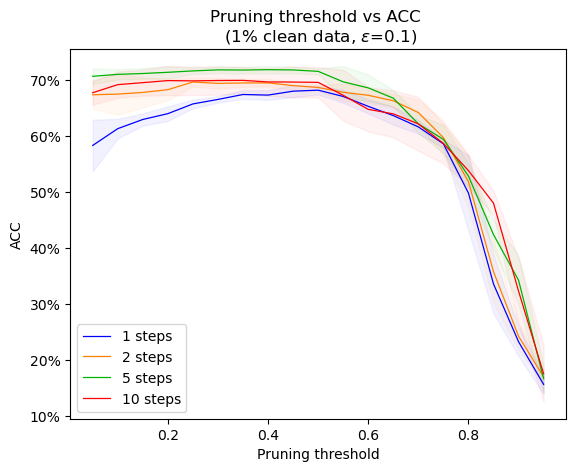

In [78]:
ks = ['1', '2', '5', '10']
colors = [[0, 0, 1], [1, 0.5, 0], [0, 0.7, 0], [1, 0, 0]]

for i in range(4):
    plt.plot(threshold_values, acc_data[ks[i]][0]*100, color=colors[i], linewidth=0.9, label=f'{ks[i]} steps')
    plt.fill_between(threshold_values, (acc_data[ks[i]][0]-acc_data[ks[i]][1])*100, (acc_data[ks[i]][0]+acc_data[ks[i]][1])*100, color=colors[i] + [0.05])

plt.title('Pruning threshold vs ACC \n (1% clean data, $\\epsilon$=0.1)')
plt.xlabel('Pruning threshold')
plt.ylabel('ACC')
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [79]:
acc_data = generate_plot_threshold_acc_graph(stats_1per_ep04)

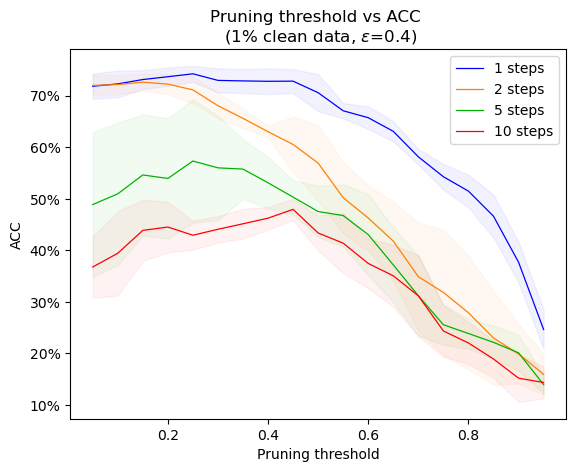

In [80]:
ks = ['1', '2', '5', '10']
colors = [[0, 0, 1], [1, 0.5, 0], [0, 0.7, 0], [1, 0, 0]]

for i in range(4):
    plt.plot(threshold_values, acc_data[ks[i]][0]*100, color=colors[i], linewidth=0.9, label=f'{ks[i]} steps')
    plt.fill_between(threshold_values, (acc_data[ks[i]][0]-acc_data[ks[i]][1])*100, (acc_data[ks[i]][0]+acc_data[ks[i]][1])*100, color=colors[i] + [0.05])

plt.title('Pruning threshold vs ACC \n (1% clean data, $\\epsilon$=0.4)')
plt.xlabel('Pruning threshold')
plt.ylabel('ACC')
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()